# Data Preprocessing and Regression Analysis

This notebook covers:
1. Loading CSV dataset and handling missing values (mean & median imputation)
2. Normalization (Min-Max) and Standardization (Z-score)
3. Outlier detection and removal using IQR method
4. Linear Regression, Multi-linear Regression, and Logistic Regression


In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
try:
    plt.style.use('seaborn-v0_8')
except OSError:
    plt.style.use('seaborn')
sns.set_palette("husl")


## 1. Load CSV Dataset


In [7]:
# Load the CSV dataset
df = pd.read_csv('healthcare_dataset.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()


Dataset Shape: (55500, 15)

First few rows:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [8]:
# Check for missing values

print("Missing values in dataset:")

print(df.isnull().sum())

print(f"\nTotal missing values: {df.isnull().sum().sum()}")



# Display data types

print("\nData types:")

print(df.dtypes)



# Basic statistics

print("\nBasic statistics:")

df.describe()


Missing values in dataset:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Total missing values: 0

Data types:
Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

Basic statistics:


,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


## 2. Handle Missing Values using Mean and Median Imputation


In [9]:
# Create a copy of the dataframe for imputation
df_imputed = df.copy()

# Identify numerical columns
numerical_cols = df_imputed.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)

# Check missing values in numerical columns
print("\nMissing values in numerical columns:")
print(df_imputed[numerical_cols].isnull().sum())


Numerical columns: ['Age', 'Billing Amount', 'Room Number']

Missing values in numerical columns:
Age               0
Billing Amount    0
Room Number       0
dtype: int64


In [10]:
# Method 1: Mean Imputation
df_mean_imputed = df_imputed.copy()

# Fill missing values in numerical columns with mean
for col in numerical_cols:
    if df_mean_imputed[col].isnull().sum() > 0:
        mean_value = df_mean_imputed[col].mean()
        df_mean_imputed[col].fillna(mean_value, inplace=True)
        print(f"Mean imputation for {col}: {mean_value:.2f}")

print("\nMissing values after mean imputation:")
print(df_mean_imputed[numerical_cols].isnull().sum().sum())



Missing values after mean imputation:
0


In [11]:
# Method 2: Median Imputation
df_median_imputed = df_imputed.copy()

# Fill missing values in numerical columns with median
for col in numerical_cols:
    if df_median_imputed[col].isnull().sum() > 0:
        median_value = df_median_imputed[col].median()
        df_median_imputed[col].fillna(median_value, inplace=True)
        print(f"Median imputation for {col}: {median_value:.2f}")

print("\nMissing values after median imputation:")
print(df_median_imputed[numerical_cols].isnull().sum().sum())



Missing values after median imputation:
0


In [12]:
# Use median imputed dataset for further processing (more robust to outliers)
df_processed = df_median_imputed.copy()

# Display summary
print("Dataset after imputation:")
print(f"Shape: {df_processed.shape}")
print(f"Missing values: {df_processed.isnull().sum().sum()}")
df_processed[numerical_cols].describe()


Dataset after imputation:
Shape: (55500, 15)
Missing values: 0


,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


## 3. Apply Normalization (Min-Max) and Standardization (Z-score)


In [13]:
# Create copies for different scaling methods
df_minmax = df_processed.copy()
df_standardized = df_processed.copy()

# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()


In [14]:
# Apply Min-Max Normalization (scales data to range [0, 1])
df_minmax[numerical_cols] = minmax_scaler.fit_transform(df_processed[numerical_cols])

print("Min-Max Normalized Data:")
print(df_minmax[numerical_cols].describe())
print(f"\nMin values: {df_minmax[numerical_cols].min().min():.4f}")
print(f"Max values: {df_minmax[numerical_cols].max().max():.4f}")


Min-Max Normalized Data:
                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean       0.507098        0.502947      0.501591
std        0.257927        0.259462      0.288830
min        0.000000        0.000000      0.000000
25%        0.289474        0.278418      0.253133
50%        0.513158        0.502924      0.503759
75%        0.723684        0.727168      0.751880
max        1.000000        1.000000      1.000000

Min values: 0.0000
Max values: 1.0000


In [15]:
# Apply Z-score Standardization (mean=0, std=1)
df_standardized[numerical_cols] = standard_scaler.fit_transform(df_processed[numerical_cols])

print("Z-score Standardized Data:")
print(df_standardized[numerical_cols].describe())
print(f"\nMean values (should be ~0): {df_standardized[numerical_cols].mean().mean():.6f}")
print(f"Std values (should be ~1): {df_standardized[numerical_cols].std().mean():.6f}")


Z-score Standardized Data:
                Age  Billing Amount   Room Number
count  5.550000e+04    5.550000e+04  5.550000e+04
mean   7.732753e-17    5.703546e-17  2.344151e-16
std    1.000009e+00    1.000009e+00  1.000009e+00
min   -1.966071e+00   -1.938440e+00 -1.736648e+00
25%   -8.437519e-01   -8.653725e-01 -8.602315e-01
50%    2.349424e-02   -8.772730e-05  7.507427e-03
75%    8.397259e-01    8.641834e-01  8.665690e-01
max    1.911030e+00    1.915723e+00  1.725631e+00

Mean values (should be ~0): 0.000000
Std values (should be ~1): 1.000009


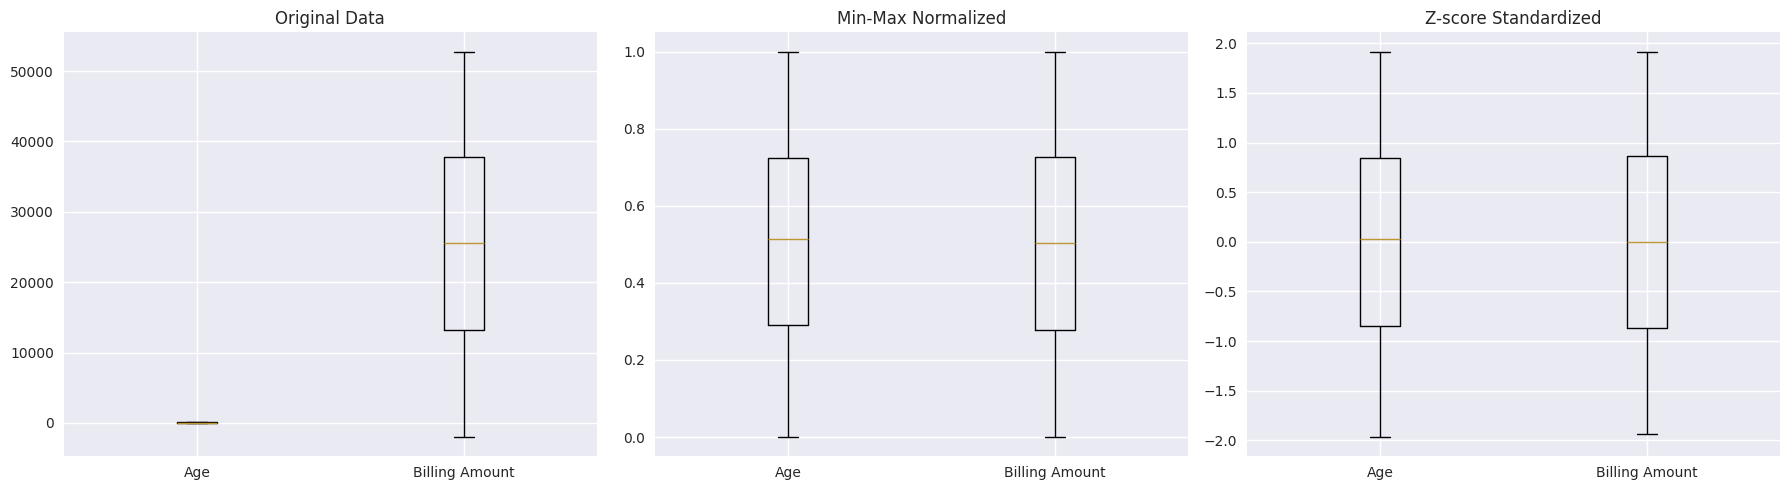

In [17]:
# Visualize the differences
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original data
axes[0].boxplot([df_processed['Age'], df_processed['Billing Amount']])
axes[0].set_title('Original Data')
axes[0].set_xticklabels(['Age', 'Billing Amount'])
axes[0].grid(True)

# Min-Max normalized
axes[1].boxplot([df_minmax['Age'], df_minmax['Billing Amount']])
axes[1].set_title('Min-Max Normalized')
axes[1].set_xticklabels(['Age', 'Billing Amount'])
axes[1].grid(True)

# Z-score standardized
axes[2].boxplot([df_standardized['Age'], df_standardized['Billing Amount']])
axes[2].set_title('Z-score Standardized')
axes[2].set_xticklabels(['Age', 'Billing Amount'])
axes[2].grid(True)

plt.tight_layout()
plt.show()


## 4. Detect and Remove Outliers using IQR (Interquartile Range) Method


In [18]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    """
    Detect outliers using Interquartile Range (IQR) method
    Outliers are values that fall outside Q1 - 1.5*IQR and Q3 + 1.5*IQR
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for numerical columns
outlier_summary = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df_processed, col)
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df_processed)) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    }

# Display outlier summary
outlier_df = pd.DataFrame(outlier_summary).T
print("Outlier Summary (IQR Method):")
print(outlier_df)


Outlier Summary (IQR Method):
                count  percentage   lower_bound   upper_bound
Age               0.0         0.0    -14.500000    117.500000
Billing Amount    0.0         0.0 -23627.701023  74689.434111
Room Number       0.0         0.0    -96.500000    699.500000


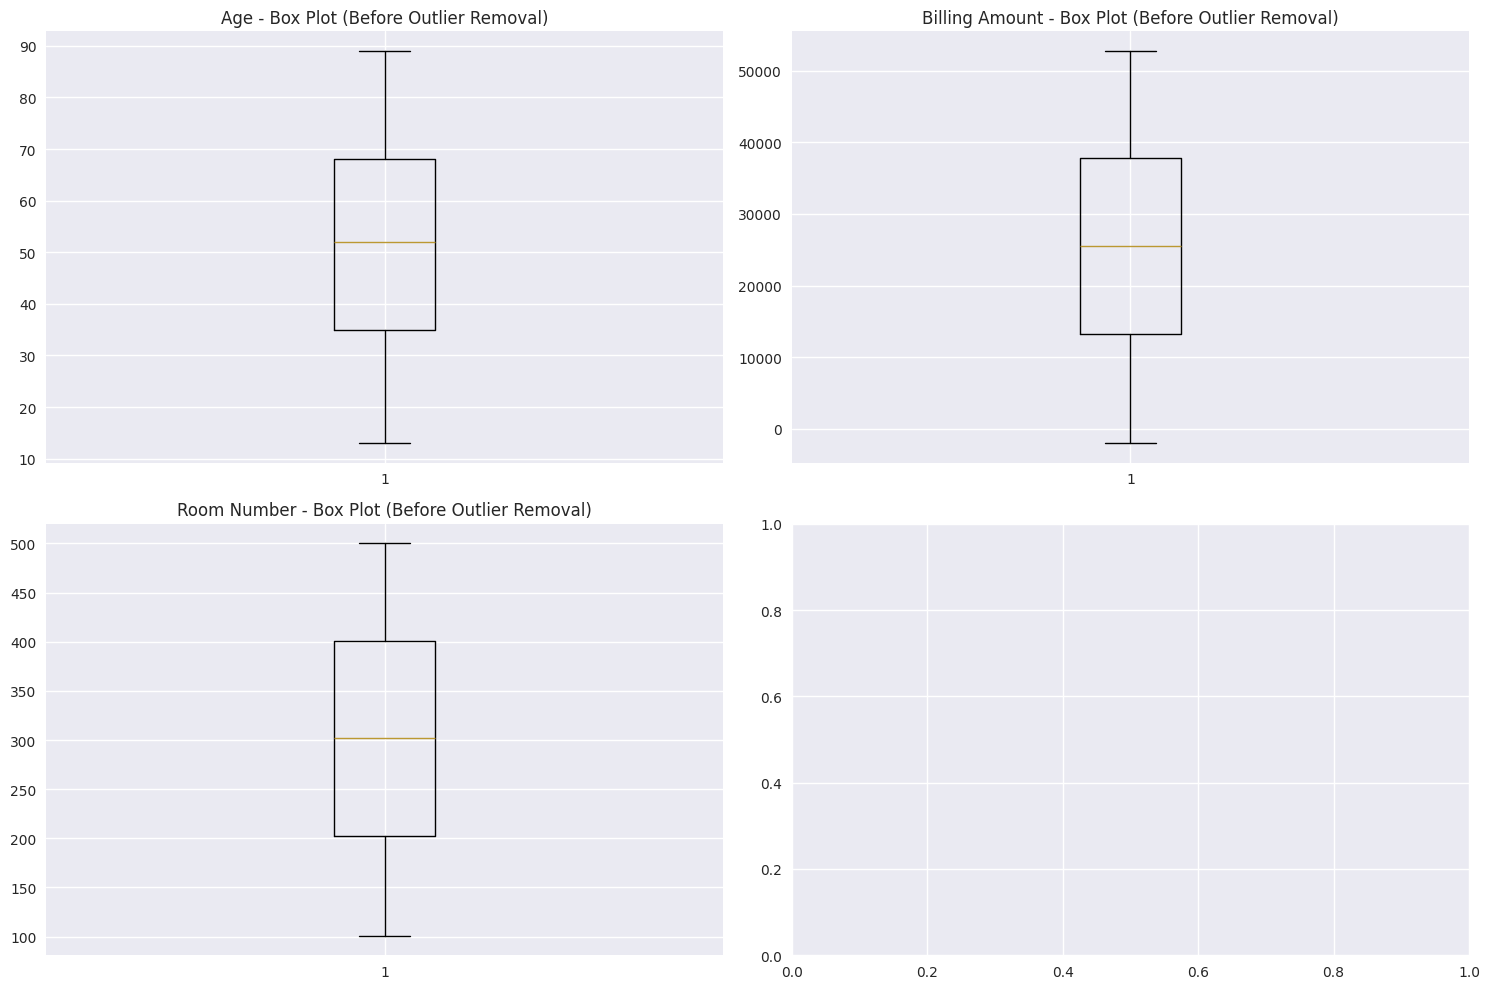

In [19]:
# Visualize outliers before removal
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, col in enumerate(numerical_cols[:4]):  # Plot first 4 numerical columns
    row = idx // 2
    col_idx = idx % 2
    axes[row, col_idx].boxplot(df_processed[col])
    axes[row, col_idx].set_title(f'{col} - Box Plot (Before Outlier Removal)')
    axes[row, col_idx].grid(True)

plt.tight_layout()
plt.show()


In [20]:
# Remove outliers using IQR method
df_no_outliers = df_processed.copy()

print("Removing outliers using IQR method...")
print(f"Original dataset shape: {df_no_outliers.shape}")

# Remove outliers from each numerical column
outliers_removed = 0
for col in numerical_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before removal
    before_count = len(df_no_outliers)
    
    # Remove outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & 
                                     (df_no_outliers[col] <= upper_bound)]
    
    # Count outliers removed
    removed = before_count - len(df_no_outliers)
    outliers_removed += removed
    if removed > 0:
        print(f"  {col}: Removed {removed} outliers")

print(f"\nTotal rows removed: {outliers_removed}")
print(f"Dataset shape after outlier removal: {df_no_outliers.shape}")
print(f"Percentage of data retained: {(len(df_no_outliers)/len(df_processed))*100:.2f}%")


Removing outliers using IQR method...
Original dataset shape: (55500, 15)

Total rows removed: 0
Dataset shape after outlier removal: (55500, 15)
Percentage of data retained: 100.00%


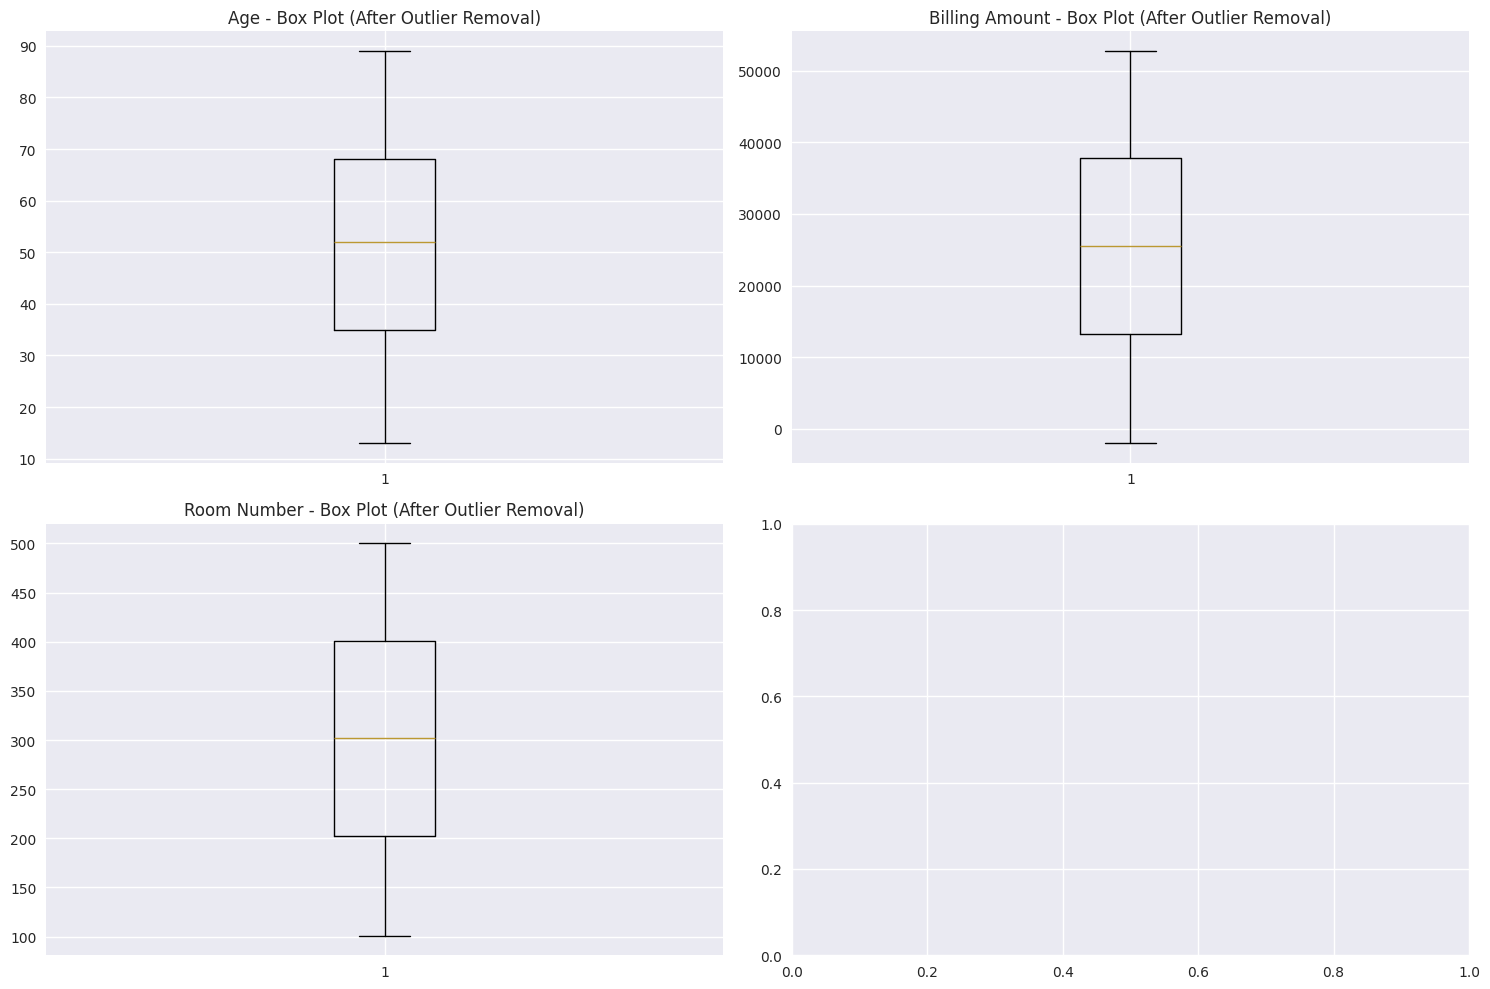

In [21]:
# Visualize outliers after removal
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, col in enumerate(numerical_cols[:4]):  # Plot first 4 numerical columns
    row = idx // 2
    col_idx = idx % 2
    axes[row, col_idx].boxplot(df_no_outliers[col])
    axes[row, col_idx].set_title(f'{col} - Box Plot (After Outlier Removal)')
    axes[row, col_idx].grid(True)

plt.tight_layout()
plt.show()


## 5. Regression Models

### 5.1 Linear Regression (Simple Linear Regression)


In [22]:
# For linear regression, let's predict Billing Amount based on Age
# Using the dataset without outliers
df_regression = df_no_outliers.copy()

# Prepare data for linear regression
X_simple = df_regression[['Age']].values
y_simple = df_regression['Billing Amount'].values

# Split the data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Create and train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_simple, y_train_simple)

# Make predictions
y_pred_simple = lr_model.predict(X_test_simple)

# Calculate metrics
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print("Simple Linear Regression Results:")
print(f"Predicting: Billing Amount from Age")
print(f"Mean Squared Error: {mse_simple:.2f}")
print(f"R² Score: {r2_simple:.4f}")
print(f"Coefficient: {lr_model.coef_[0]:.2f}")
print(f"Intercept: {lr_model.intercept_:.2f}")


Simple Linear Regression Results:
Predicting: Billing Amount from Age
Mean Squared Error: 199022401.23
R² Score: -0.0006
Coefficient: -6.96
Intercept: 25870.21


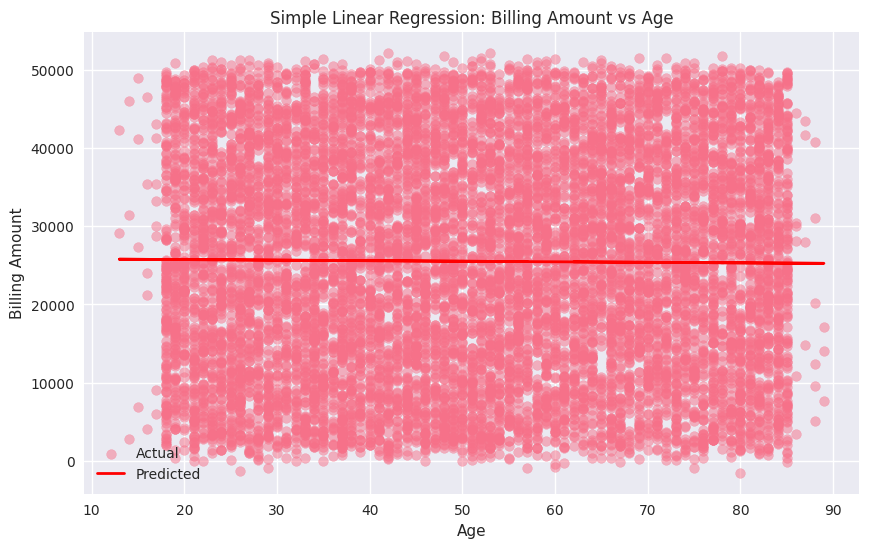

In [23]:
# Visualize simple linear regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test_simple, alpha=0.5, label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.title('Simple Linear Regression: Billing Amount vs Age')
plt.legend()
plt.grid(True)
plt.show()


### 5.2 Multi-linear Regression (Multiple Linear Regression)


In [25]:
# For multi-linear regression, predict Billing Amount using multiple features
# Select features (excluding target and non-numerical columns that need encoding)
feature_cols = ['Age', 'Room Number']  # Using numerical features

# Check if we have enough numerical features
if len(numerical_cols) > 2:
    # Use Age and Room Number as features (excluding Billing Amount if it's the target)
    available_features = [col for col in numerical_cols if col != 'Billing Amount']
    if 'Age' in available_features and 'Room Number' in available_features:
        feature_cols = ['Age', 'Room Number']
    else:
        feature_cols = available_features[:2]  # Use first 2 available features
else:
    feature_cols = [col for col in numerical_cols if col != 'Billing Amount']

print(f"Features used for multi-linear regression: {feature_cols}")

# Prepare data
X_multi = df_regression[feature_cols].values
y_multi = df_regression['Billing Amount'].values

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Create and train multi-linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = mlr_model.predict(X_test_multi)

# Calculate metrics
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("\nMulti-linear Regression Results:")
print(f"Predicting: Billing Amount from {feature_cols}")
print(f"Mean Squared Error: {mse_multi:.2f}")
print(f"R² Score: {r2_multi:.4f}")
print(f"\nCoefficients:")
for i, col in enumerate(feature_cols):
    print(f"  {col}: {mlr_model.coef_[i]:.2f}")
print(f"Intercept: {mlr_model.intercept_:.2f}")


Features used for multi-linear regression: ['Age', 'Room Number']

Multi-linear Regression Results:
Predicting: Billing Amount from ['Age', 'Room Number']
Mean Squared Error: 199022640.30
R² Score: -0.0006

Coefficients:
  Age: -6.96
  Room Number: 0.00
Intercept: 25868.73


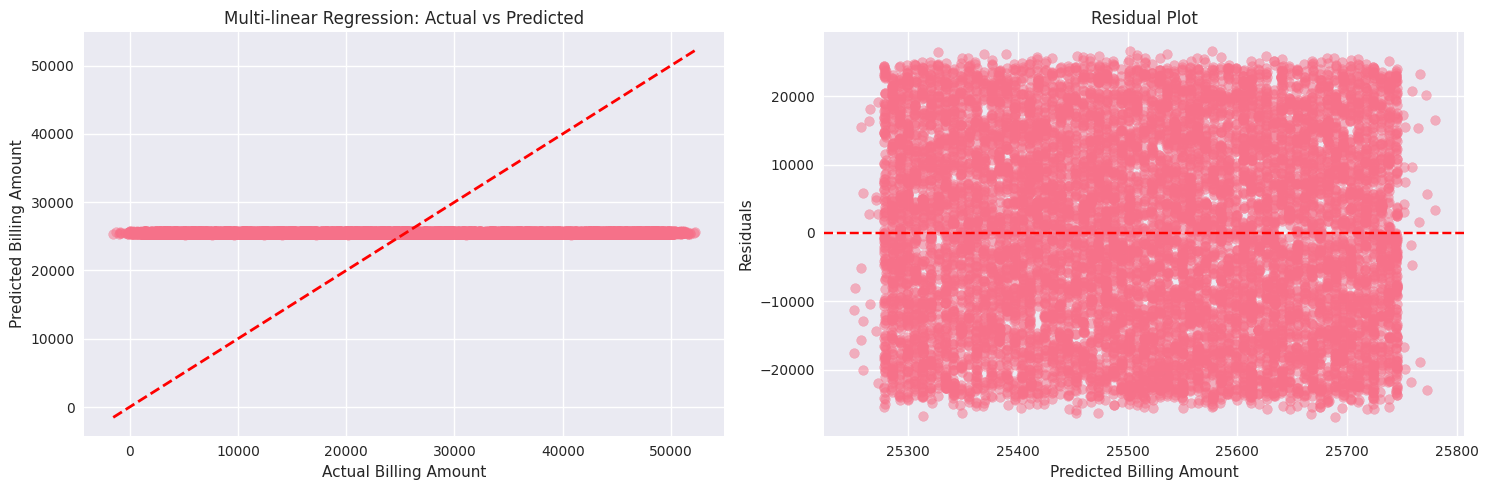

In [26]:
# Visualize multi-linear regression results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Actual vs Predicted scatter plot
axes[0].scatter(y_test_multi, y_pred_multi, alpha=0.5)
axes[0].plot([y_test_multi.min(), y_test_multi.max()], 
             [y_test_multi.min(), y_test_multi.max()], 
             'r--', lw=2)
axes[0].set_xlabel('Actual Billing Amount')
axes[0].set_ylabel('Predicted Billing Amount')
axes[0].set_title('Multi-linear Regression: Actual vs Predicted')
axes[0].grid(True)

# Residual plot
residuals = y_test_multi - y_pred_multi
axes[1].scatter(y_pred_multi, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Billing Amount')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(True)

plt.tight_layout()
plt.show()


### 5.3 Logistic Regression


In [27]:
# For logistic regression, we need a binary target variable
# Let's predict Medical Condition (binary classification) or create a binary target
# We'll create a binary target: High Billing Amount (1 if > median, 0 otherwise)

df_logistic = df_no_outliers.copy()

# Create binary target variable
median_billing = df_logistic['Billing Amount'].median()
df_logistic['High_Billing'] = (df_logistic['Billing Amount'] > median_billing).astype(int)

print(f"Binary target created: High_Billing (1 if Billing Amount > {median_billing:.2f})")
print(f"Class distribution:")
print(df_logistic['High_Billing'].value_counts())
print(f"\nPercentage:")
print(df_logistic['High_Billing'].value_counts(normalize=True) * 100)


Binary target created: High_Billing (1 if Billing Amount > 25538.07)
Class distribution:
High_Billing
0    27750
1    27750
Name: count, dtype: int64

Percentage:
High_Billing
0    50.0
1    50.0
Name: proportion, dtype: float64


In [28]:
# Prepare data for logistic regression
# Use Age and Room Number as features
feature_cols_logistic = ['Age', 'Room Number']
X_logistic = df_logistic[feature_cols_logistic].values
y_logistic = df_logistic['High_Billing'].values

# Split the data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_logistic, y_logistic, test_size=0.2, random_state=42, stratify=y_logistic
)

print(f"Training set size: {len(X_train_log)}")
print(f"Test set size: {len(X_test_log)}")
print(f"\nTraining set class distribution:")
print(pd.Series(y_train_log).value_counts())
print(f"\nTest set class distribution:")
print(pd.Series(y_test_log).value_counts())


Training set size: 44400
Test set size: 11100

Training set class distribution:
0    22200
1    22200
Name: count, dtype: int64

Test set class distribution:
0    5550
1    5550
Name: count, dtype: int64


In [29]:
# Create and train logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_log, y_train_log)

# Make predictions
y_pred_log = logistic_model.predict(X_test_log)
y_pred_proba_log = logistic_model.predict_proba(X_test_log)[:, 1]

# Calculate metrics
accuracy_log = accuracy_score(y_test_log, y_pred_log)

print("Logistic Regression Results:")
print(f"Predicting: High_Billing from {feature_cols_logistic}")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_log, y_pred_log))
print(f"\nCoefficients:")
for i, col in enumerate(feature_cols_logistic):
    print(f"  {col}: {logistic_model.coef_[0][i]:.4f}")
print(f"Intercept: {logistic_model.intercept_[0]:.4f}")


Logistic Regression Results:
Predicting: High_Billing from ['Age', 'Room Number']
Accuracy: 0.5007

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      5550
           1       0.50      0.50      0.50      5550

    accuracy                           0.50     11100
   macro avg       0.50      0.50      0.50     11100
weighted avg       0.50      0.50      0.50     11100


Coefficients:
  Age: 0.0001
  Room Number: -0.0001
Intercept: 0.0107


Confusion Matrix:
[[2785 2765]
 [2777 2773]]


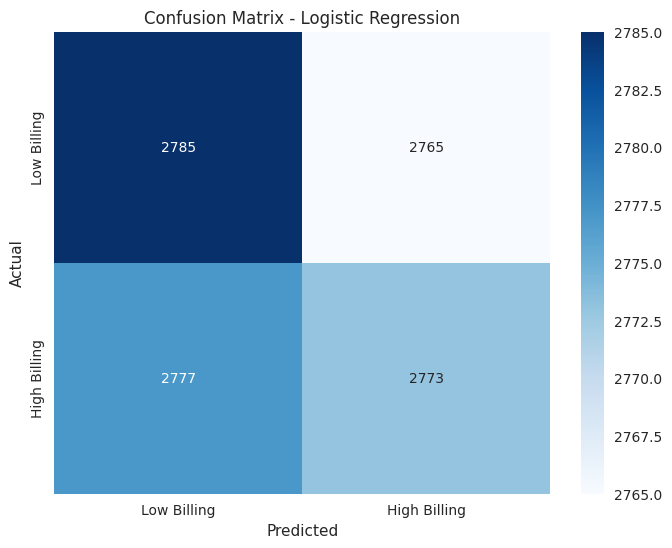

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred_log)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Billing', 'High Billing'],
            yticklabels=['Low Billing', 'High Billing'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [31]:
# Summary of all regression models
print("="*60)
print("SUMMARY OF ALL REGRESSION MODELS")
print("="*60)

print("\n1. SIMPLE LINEAR REGRESSION")
print(f"   Features: Age")
print(f"   Target: Billing Amount")
print(f"   MSE: {mse_simple:.2f}")
print(f"   R² Score: {r2_simple:.4f}")

print("\n2. MULTI-LINEAR REGRESSION")
print(f"   Features: {', '.join(feature_cols)}")
print(f"   Target: Billing Amount")
print(f"   MSE: {mse_multi:.2f}")
print(f"   R² Score: {r2_multi:.4f}")

print("\n3. LOGISTIC REGRESSION")
print(f"   Features: {', '.join(feature_cols_logistic)}")
print(f"   Target: High_Billing (Binary)")
print(f"   Accuracy: {accuracy_log:.4f}")

print("\n" + "="*60)


SUMMARY OF ALL REGRESSION MODELS

1. SIMPLE LINEAR REGRESSION
   Features: Age
   Target: Billing Amount
   MSE: 199022401.23
   R² Score: -0.0006

2. MULTI-LINEAR REGRESSION
   Features: Age, Room Number
   Target: Billing Amount
   MSE: 199022640.30
   R² Score: -0.0006

3. LOGISTIC REGRESSION
   Features: Age, Room Number
   Target: High_Billing (Binary)
   Accuracy: 0.5007

